In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

def histogram(gray):
    hist = np.array([0]*G)
    c=0
    for row in gray:
        for pixel in row:       
            hist[pixel]+=1
    return hist

def plot_histogram(hist, width=0.5, figsize=(15,5), xlabel='Intensity', ylabel='Color', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(list(range(len(hist))),hist,width=width)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)

    plt.show()

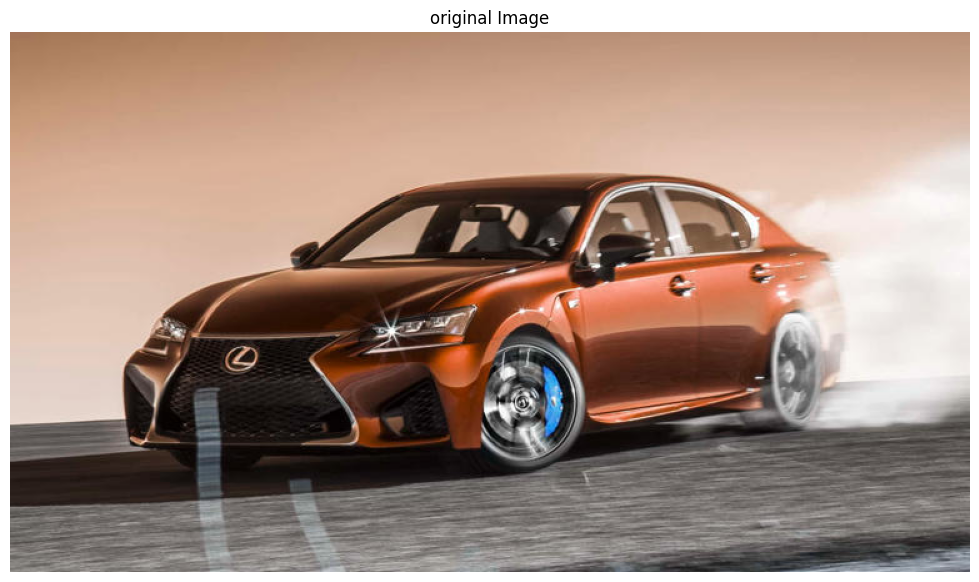

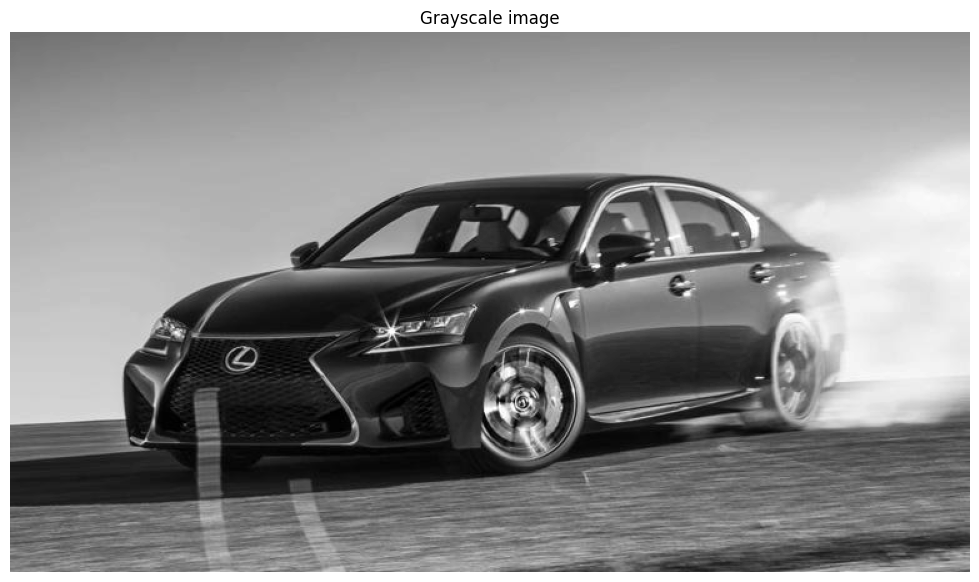

In [21]:
# read an image and convert to grayscale
# Read the image
image = cv2.imread('images/car.jpg')
# print('original image', image)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print("gray scale image", gray_image)
plotimage(image, "original Image")
plotimage(gray_image, "Grayscale image")

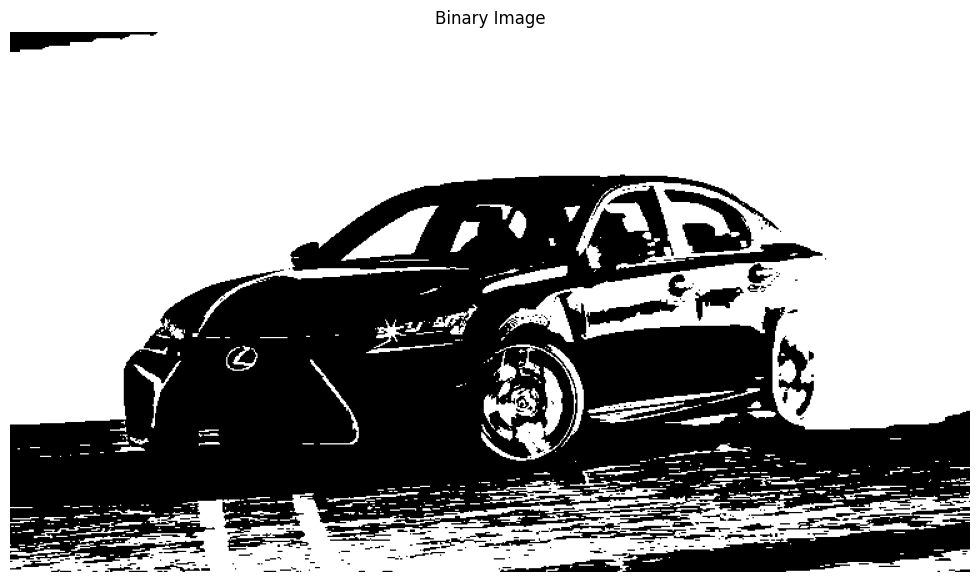

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [23]:
# convert to binary image
threshold_value = 120  # Threshold value (adjust as needed)
max_value = 255  # Maximum pixel intensity value
_, binary_image = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY)
plotimage(binary_image, "Binary Image")
cv2.imwrite("bin_img.png", binary_image)
print(binary_image)

# Image Negative

In [4]:
# read image
# Image negative
img = cv2.imread('images/cameraman.png',0) 
print(f"shape:{img.shape}")
print("orginal image\n", img)

shape:(256, 256)
orginal image
 [[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


max 255
[[ 99  96  97 ... 104 103 103]
 [ 95 101  98 ... 101 100 102]
 [ 99  96  97 ... 104 103 103]
 ...
 [141 123 132 ... 120 118 141]
 [134 129 125 ... 122 125 142]
 [134 129 125 ... 122 125 142]]


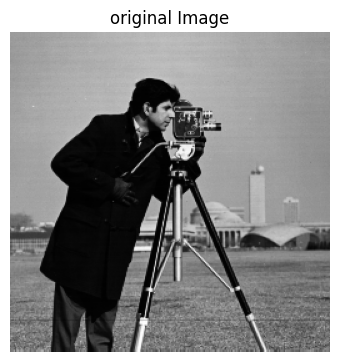

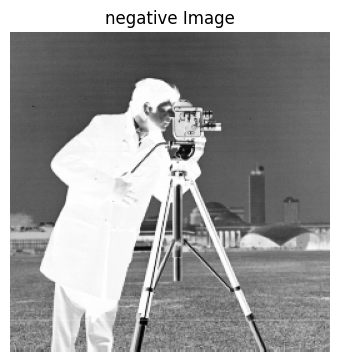

In [25]:
# To find the maximum grey level
# value in the image
L = img.max()
print("max",L)

# Maximum grey level value minus the original image gives the negative image
img_neg = L-img 
print(img_neg)
# convert the np array img_neg to 
# a png image
cv2.imwrite('images/Cameraman_Negative.png', img_neg)
plotimage(img, "original Image")
plotimage(img_neg, "negative Image")


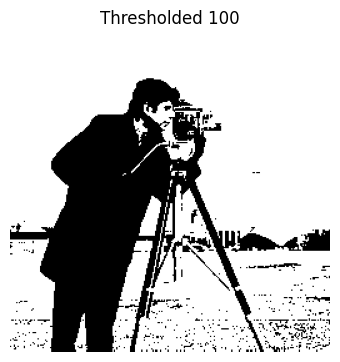

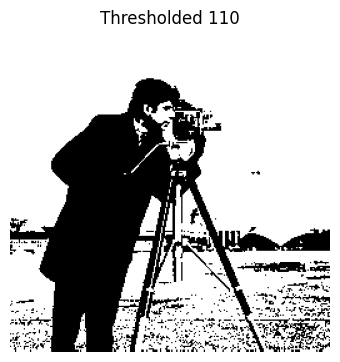

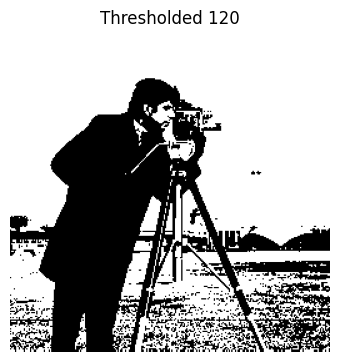

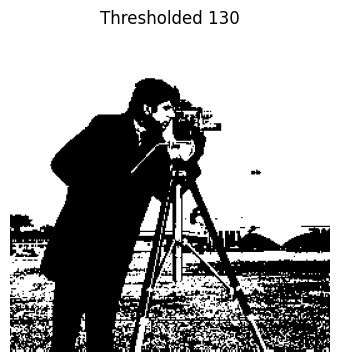

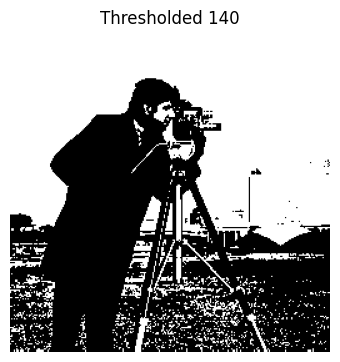

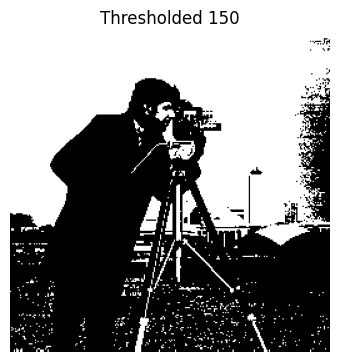

In [30]:
# To ascertain total numbers of 
# rows and columns of the image,
# size of the image
m,n = img.shape

# Thresholding without background 
# Let threshold = T
# Let pixel value in the original be denoted by r
# Let pixel value in the new image be denoted by s
# If r<T, s= 0
# If r>T, s=255

T = 150
T = [100, 110, 120, 130, 140, 150]
# create an array of zeros
for t in T:
	img_thresh = np.zeros((m,n), dtype = int) 

	for i in range(m):
		
		for j in range(n):
			
			if img[i,j] < t: 
				img_thresh[i,j]= 0
			else:
				img_thresh[i,j] = 255

	plotimage(img_thresh, f"Thresholded {t}")

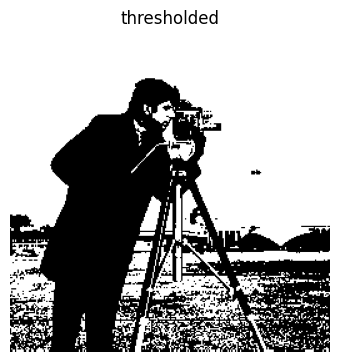

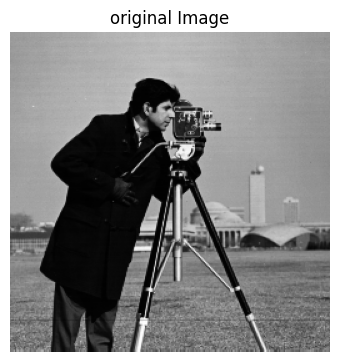

In [8]:
image = cv2.imread('images/cameraman.png', 0)  # Read the image in grayscale mode

# Apply a simple thresholding technique
threshold_value = 128  # Threshold value (adjust as needed)
max_value = 255  # Maximum pixel intensity value
_, thresholded_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
plotimage(thresholded_image, "thresholded")
plotimage(image, "original Image")

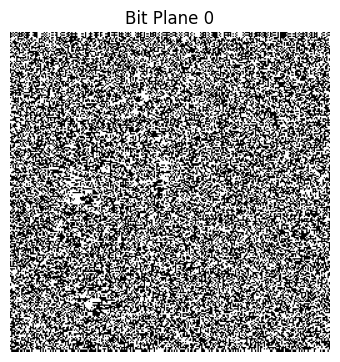

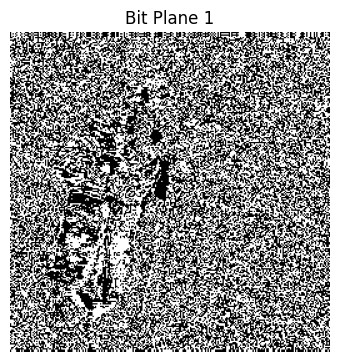

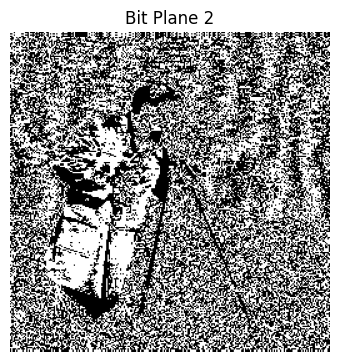

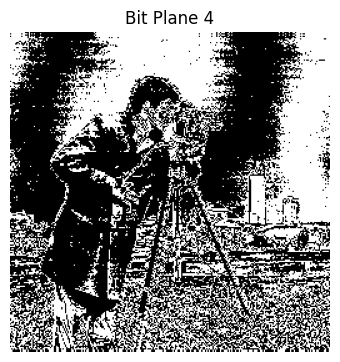

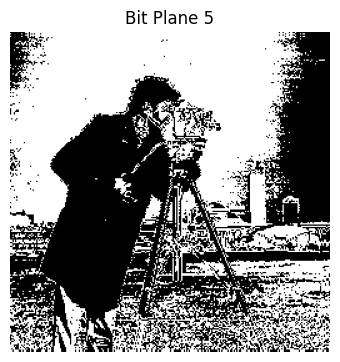

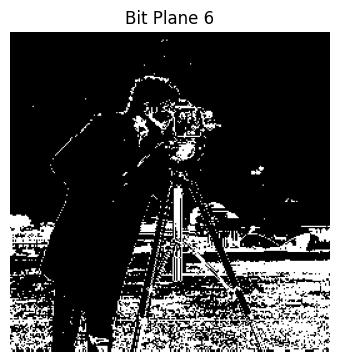

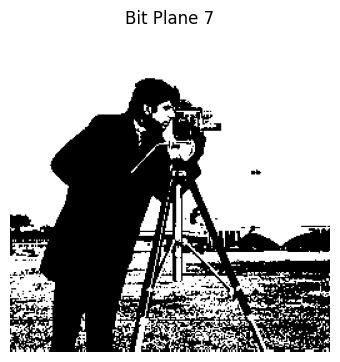

In [8]:

def bit_plane_slicing(image):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # Initialize an empty list to store the bit planes
    bit_planes = []

    # Iterate through each bit position (0 to 7 for 8-bit grayscale)
    for bit_position in range(8):
        # Extract the bit plane corresponding to the current bit position
        bit_plane = np.bitwise_and(gray_image, 2**bit_position)
        
        # Add the bit plane to the list
        bit_planes.append(bit_plane.astype(np.uint8) * 255)  # Scale to 0-255 for visualization
    
    return bit_planes

# Load an example grayscale image
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform bit-plane slicing
bit_planes = bit_plane_slicing(image)

# Display each bit plane
for i, bit_plane            in enumerate(bit_planes):
    # cv2.imshow(f"Bit Plane {i}", bit_plane)
    plotimage(bit_plane, f'Bit Plane {i}')



# Logarithmic Enhancement

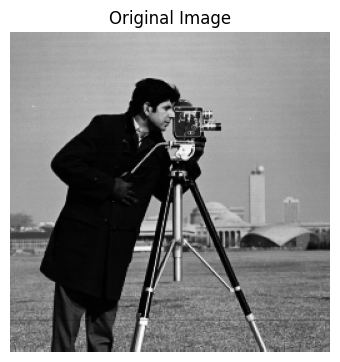

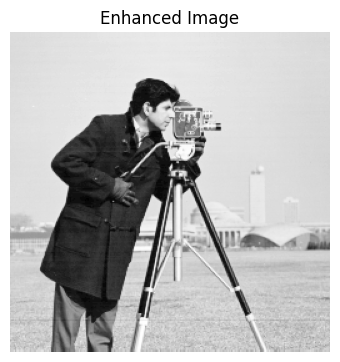

In [9]:
def logarithmic_enhancement(image, c=1):
    # Apply logarithmic transformation
    enhanced_image = c * np.log1p(image.astype(np.float32))
    
    # Scale the result to the range [0, 255]
    enhanced_image = (255 * (enhanced_image - np.min(enhanced_image)) / np.ptp(enhanced_image)).astype(np.uint8)
    
    return enhanced_image

# Load an example image (grayscale)
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform logarithmic enhancement (adjust the value of c for different enhancement levels)
enhanced_image = logarithmic_enhancement(image, c=30)

cv2.imwrite('images/enhanced_image.png', enhanced_image)
# Display the original and enhanced images
plotimage(image, 'Original Image')
plotimage(enhanced_image, 'Enhanced Image')


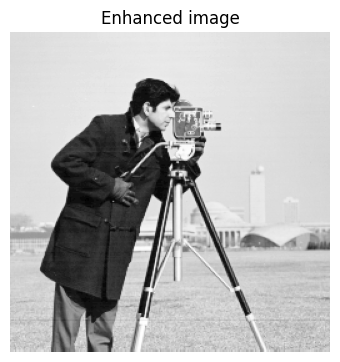

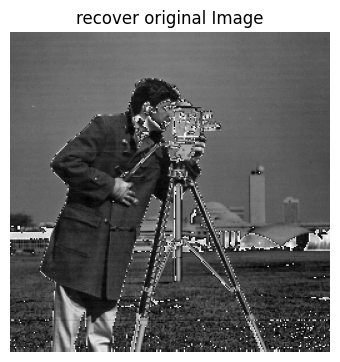

In [10]:
def inverse_log_transform(enhanced_image):
    # Apply the inverse log transform
    original_image = np.exp(enhanced_image / 255) - 1
    original_image = (original_image * 255).astype(np.uint8)  # Scale back to 0-255 range
    return original_image

# Load the enhanced image
enhanced_image_path = "images/enhanced_image.png"  # Provide the path to your enhanced image
enhanced_image = cv2.imread(enhanced_image_path, cv2.IMREAD_GRAYSCALE)

# Perform the inverse log transform
original_image = inverse_log_transform(enhanced_image)

# Display the original and recovered images
plotimage(enhanced_image, "Enhanced image")
plotimage(original_image, 'recover original Image')


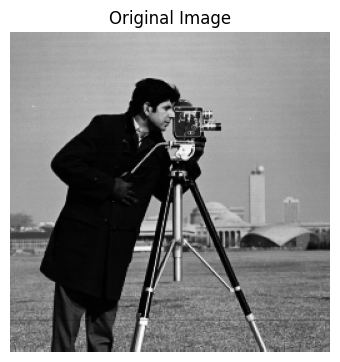

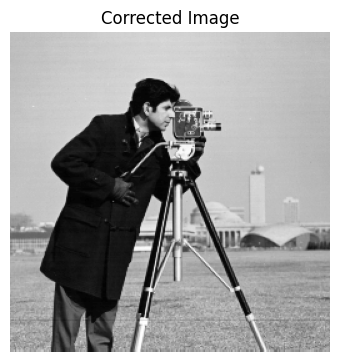

In [11]:
def gamma_correction(image, gamma=1.0):
    # Apply gamma correction
    corrected_image = np.uint8(255 * (image / 255) ** gamma)
    return corrected_image

# Load an example image
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the gamma value (adjust as needed)
gamma_value = 0.5

# Perform gamma correction
corrected_image = gamma_correction(image, gamma_value)

plotimage(image, "Original Image")
plotimage(corrected_image, "Corrected Image")

https://github.com/ghaiszaher/Image-Processing-Lab/blob/master/jupyter/02-dilation_erosion_opening_closing.ipynb

In [14]:
image_path = "1.jpg"
G = 256

Read Image

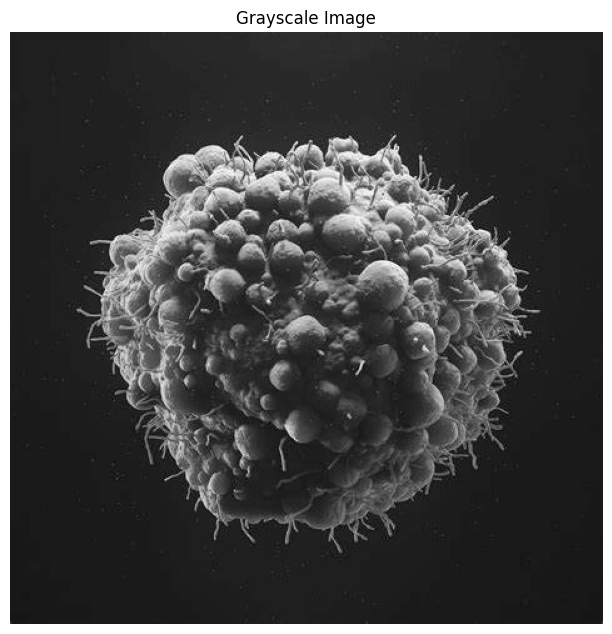

In [11]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')

In [15]:
hist = histogram(gray)

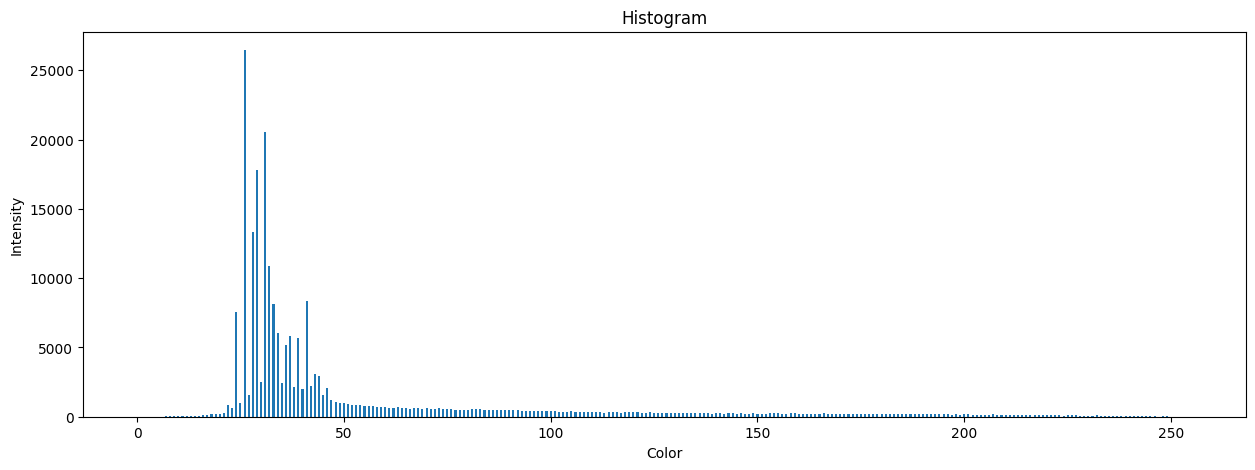

In [16]:
plot_histogram(hist)

Cumulative Histogram

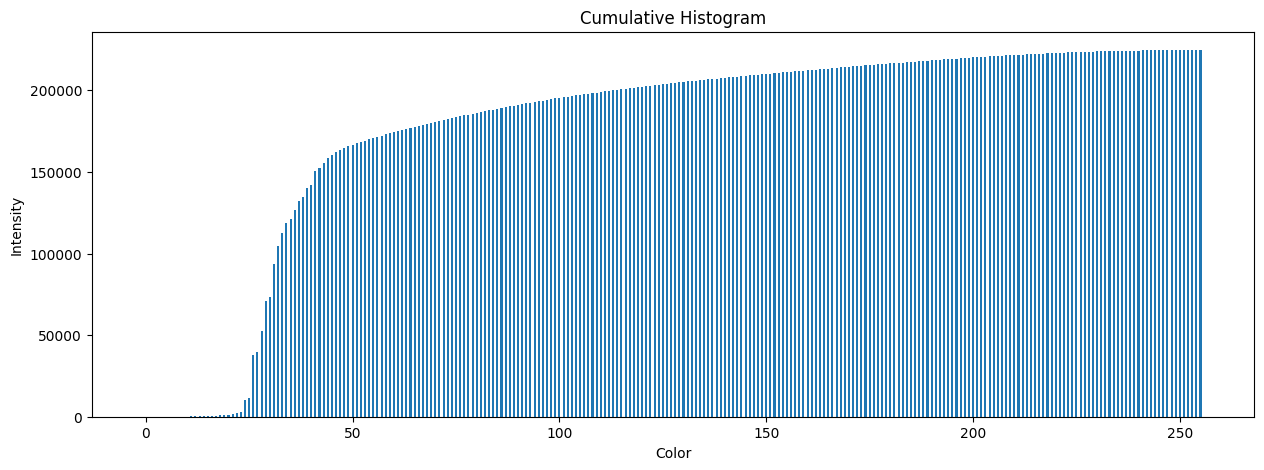

In [17]:
hist_cum = hist.copy()
for i in range(1,len(hist)):
    hist_cum[i]+=hist_cum[i-1]


plot_histogram(hist_cum,title='Cumulative Histogram')

Equalization

before


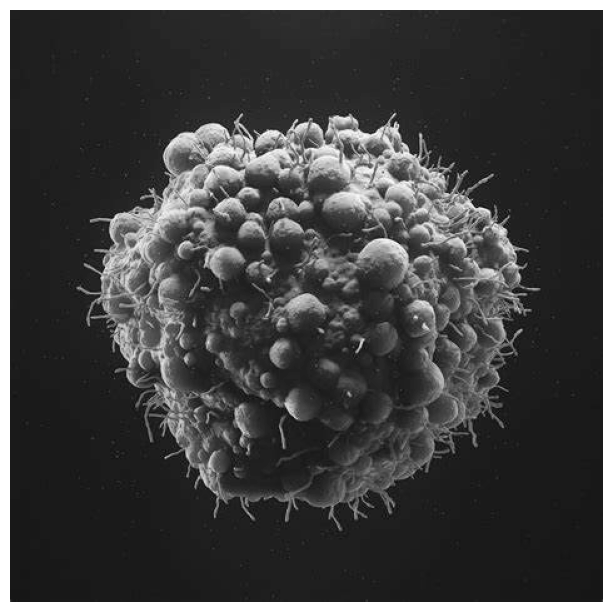

after


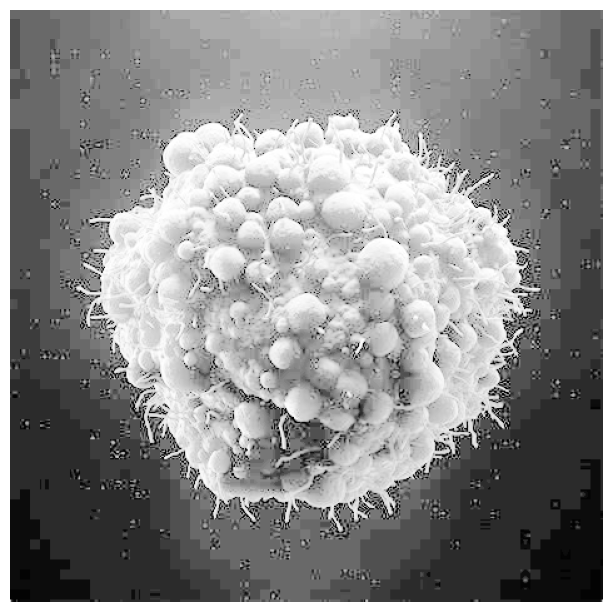

In [18]:
t = np.round((G-1)/(gray.shape[0]*gray.shape[1])*hist_cum)

output = gray.copy()

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        output[i,j] = t[output[i,j]]

print("before")
plotimage(gray)
print("after")
plotimage(output)

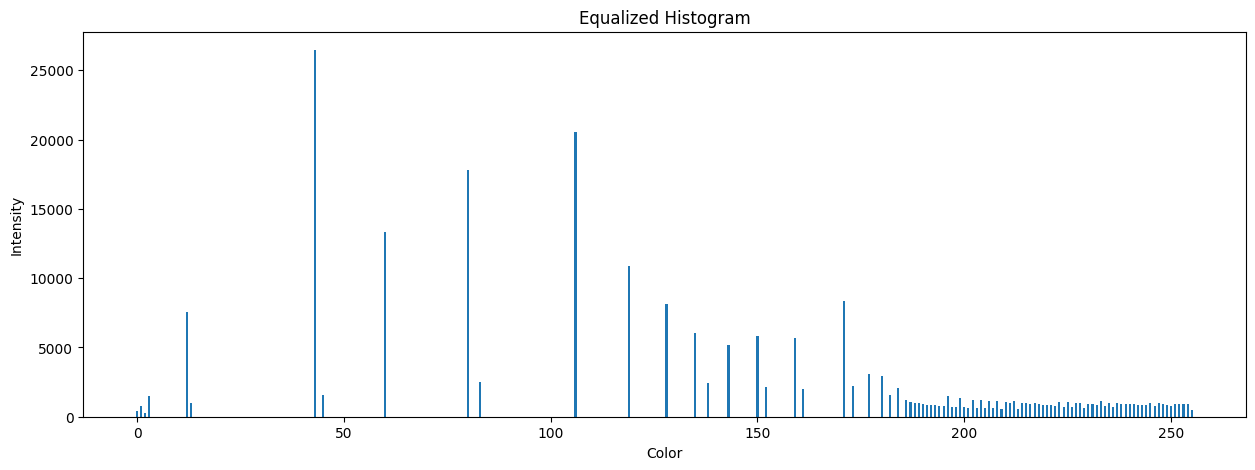

In [19]:
hist_after = histogram(output)
plot_histogram(hist_after, title="Equalized Histogram")

Complement

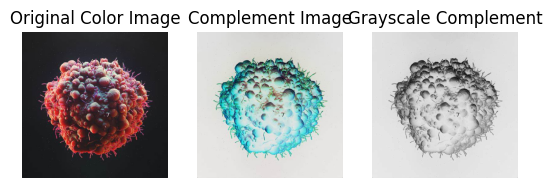

In [3]:
# Read the color image
image = cv2.imread('1.jpg')

# Convert the color image to its complement
complement_image = 255 - image

# Convert the complement image to grayscale
grayscale_complement = cv2.cvtColor(complement_image, cv2.COLOR_BGR2GRAY)

# Display the original color image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# Display the complement image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(complement_image, cv2.COLOR_BGR2RGB))
plt.title('Complement Image')
plt.axis('off')

# Display the grayscale version of the complement
plt.subplot(1, 3, 3)
plt.imshow(grayscale_complement, cmap='gray')
plt.title('Grayscale Complement')
plt.axis('off')

plt.show()

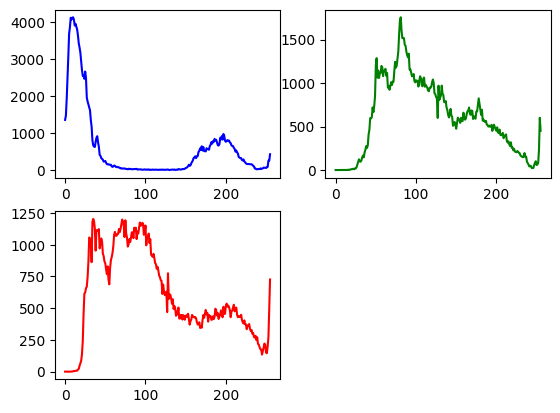

In [3]:

#import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#using opencv to read an image
#BGR Image
image = cv2.imread("img1.png")

#seperating colour channels
B = image[:,:,0] #blue layer
G = image[:,:,1] #green layer
R = image[:,:,2] #red layer

#calculating histograms for each channel
B_histo = cv2.calcHist([image],[0], None, [256], [0,256])
G_histo = cv2.calcHist([image],[1], None, [256], [0,256])
R_histo = cv2.calcHist([image],[2], None, [256], [0,256])

#visualizing histograms
plt.subplot(2, 2, 1)
plt.plot(B_histo, 'b')
plt.subplot(2, 2, 2)
plt.plot(G_histo, 'g')
plt.subplot(2, 2, 3)
plt.plot(R_histo, 'r')

#visualizing image
cv2.namedWindow("BGR Image", cv2.WINDOW_NORMAL);
cv2.imshow("BGR Image",image);
cv2.waitKey(0) & 0xFF 
cv2.destroyAllWindows()